In [ ]:
#Terminal commands
muscle -in seqs.fa -out seqs.aligned.fa

fasttree -nt < seqs.aligned.fa > tree.nwk


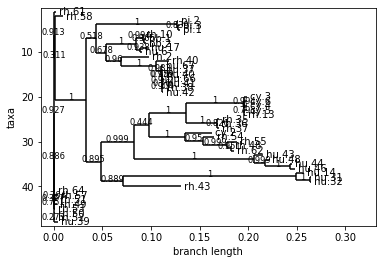

In [2]:
from Bio import Phylo
from io import StringIO

#Draw the phylogenetic tree with tree.nwk
tree = Phylo.read("tree.nwk","newick") 
Phylo.draw(tree)


In [3]:
#Grab sequences of specimen from seqs.fa
from Bio import SeqIO
my_sec = []

specimen = set(["hu.39", "pi.3","hu.31", "hu.43", "rh.55",])

for seq_rec in SeqIO.parse("seqs.fa","fasta"):
    if seq_rec.id in specimen:
        my_sec.append(seq_rec)

#Put sequences of specimen in to a new file named specimen_seq.fasta
SeqIO.write(my_sec, open("specimen_seq.fasta","w"), "fasta")


#Print these specimen‘s information to check
for index, record in enumerate(SeqIO.parse("specimen_seq.fasta","fasta")):
    print("index %i, ID = %s, length %i, with %i features"
          %(index, record.id, len(record.seq), len(record.features)))

    

index 0, ID = hu.31, length 2211, with 0 features
index 1, ID = hu.39, length 2217, with 0 features
index 2, ID = hu.43, length 2214, with 0 features
index 3, ID = pi.3, length 2196, with 0 features
index 4, ID = rh.55, length 2214, with 0 features


#Then I download the specimen_seq.fasta and upload it to https://blast.ncbi.nlm.nih.gov/Blast.cgi
blast against nr/nt

#Annotation for these five specimen sequence, obtained from results of blast on-line.
hu.31: Adeno-associated virus isolate hu.31 capsid protein VP1 (cap) gene, complete cds  AY530596.1

hu.39: Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds  AY530601.1

hu.43: Adeno-associated virus isolate hu.43 capsid protein VP1 (cap) gene, complete cds

pi.3: Adeno-associated virus isolate pi.3 capsid protein VP1 (cap) gene, complete cds

rh.55: Adeno-associated virus isolate rh.55 capsid protein VP1 (cap) gene, complete cds

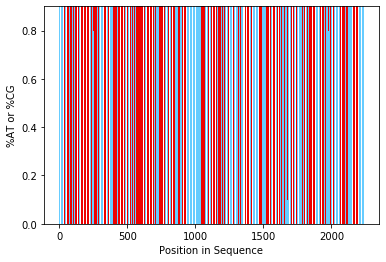

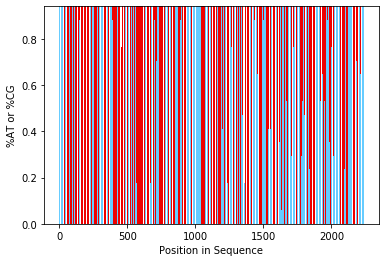

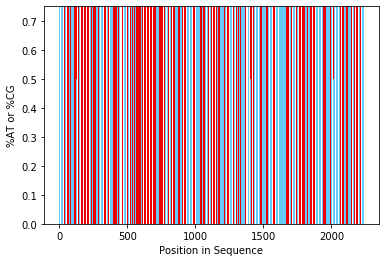

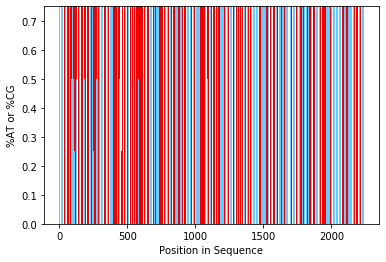

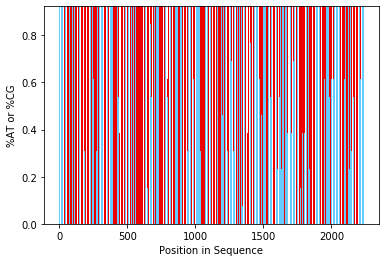

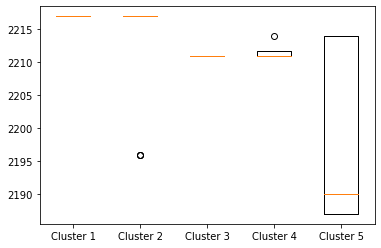

In [4]:
from Bio import SeqIO

#These are 5 clusters I choose.
cluster1 = set(["rh.50", "rh.52", "hu.39", "rh.53", "rh.49", "rh.57", "rh.51", "rh.64", "rh.61", "rh61", "rh.58"])
cluster2 = set(["pi.1", "pi.2", "pi.3", "hu.17", "hu.6", "rh.10", "bb.1", "bb.2", "rh.2", "rh.40", "hu.67", "hu.37", "hu.40", "hu.66", "hu.42","hu.41","rh.38"])
cluster3 = set(["hu.14", "hu.31", "hu.32", "rh.43"])
cluster4 = set(["hu.43", "hu.48", "hu.44", "hu.46"])
cluster5 = set(["cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "rh.35", "rh.36", "rh.37", "cy.3", "cy.6", "cy.4", "cy.5", "rh.13"])

#cluster1
#Grab seqs in cluster1 in to a new file named cluster1.fasta
my_cluster = []
for seq_recs in SeqIO.parse("seq.aligned.fa","fasta"):
    if seq_recs.id in cluster1 :
        my_cluster.append(seq_recs)

SeqIO.write(my_cluster, open("cluster1.fasta","w"), "fasta")

from Bio import AlignIO

#Use AlignIO to return a MultipleSequenceAlignment object that can be scliced by column, here I name it MSA
MSA = AlignIO.read("cluster1.fasta","fasta")

N = MSA.get_alignment_length()
R = len(MSA)
CGs = []
ATs = []

#computer every column's %GC and %AT, connect these numbers in to two lists.
#%CG goes to list named CGs, %AT goes to list named ATs
for i in range(0,N-1):
    CG = 0
    AT = 0
    for j in range(0,R-1):
        if MSA[j,i] == 'C' or MSA[j,i] == 'G':
            CG += 1
        elif MSA[j,i] == 'A' or MSA[j,i] == 'T':
            AT += 1
    CG = CG / R
    AT = AT / R
    CGs.append(CG)
    ATs.append(AT)

#Plot the bar; blue is AT and red is CG
from matplotlib import pyplot as plt

X = range(1,N)
fig = plt.figure() 
plt.ylabel("%AT or %CG")
plt.xlabel("Position in Sequence")
p1 = plt.bar(X, ATs, facecolor = '#66CCFF')
p2 = plt.bar(X, CGs, facecolor = '#EE0000', bottom = ATs)
plt.show()


#cluster2--GC plot
#The steps are just like those above which operating cluster1
my_cluster = []
for seq_recs in SeqIO.parse("seq.aligned.fa","fasta"):
    if seq_recs.id in cluster2 :
        my_cluster.append(seq_recs)

SeqIO.write(my_cluster, open("cluster2.fasta","w"), "fasta")

from Bio import AlignIO

MSA = AlignIO.read("cluster2.fasta","fasta")

N = MSA.get_alignment_length()
R = len(MSA)
CGs = []
ATs = []

for i in range(0,N-1):
    CG = 0
    AT = 0
    for j in range(0,R-1):
        if MSA[j,i] == 'C' or MSA[j,i] == 'G':
            CG += 1
        elif MSA[j,i] == 'A' or MSA[j,i] == 'T':
            AT += 1
    CG = CG / R
    AT = AT / R
    CGs.append(CG)
    ATs.append(AT)

from matplotlib import pyplot as plt

X = range(1,N)
fig = plt.figure() 
plt.ylabel("%AT or %CG")
plt.xlabel("Position in Sequence")
p1 = plt.bar(X, ATs, facecolor = '#66CCFF')
p2 = plt.bar(X, CGs, facecolor = '#EE0000', bottom = ATs)
plt.show()


#cluster3--GC plot
my_cluster = []
for seq_recs in SeqIO.parse("seq.aligned.fa","fasta"):
    if seq_recs.id in cluster3 :
        my_cluster.append(seq_recs)

SeqIO.write(my_cluster, open("cluster3.fasta","w"), "fasta")

from Bio import AlignIO

MSA = AlignIO.read("cluster3.fasta","fasta")

N = MSA.get_alignment_length()
R = len(MSA)
CGs = []
ATs = []

for i in range(0,N-1):
    CG = 0
    AT = 0
    for j in range(0,R-1):
        if MSA[j,i] == 'C' or MSA[j,i] == 'G':
            CG += 1
        elif MSA[j,i] == 'A' or MSA[j,i] == 'T':
            AT += 1
    CG = CG / R
    AT = AT / R
    CGs.append(CG)
    ATs.append(AT)

from matplotlib import pyplot as plt

X = range(1,N)
fig = plt.figure() 
plt.ylabel("%AT or %CG")
plt.xlabel("Position in Sequence")
p1 = plt.bar(X, ATs, facecolor = '#66CCFF')
p2 = plt.bar(X, CGs, facecolor = '#EE0000', bottom = ATs)
plt.show()

#cluster4--GC plot
my_cluster = []
for seq_recs in SeqIO.parse("seq.aligned.fa","fasta"):
    if seq_recs.id in cluster4 :
        my_cluster.append(seq_recs)

SeqIO.write(my_cluster, open("cluster4.fasta","w"), "fasta")

from Bio import AlignIO

MSA = AlignIO.read("cluster4.fasta","fasta")

N = MSA.get_alignment_length()
R = len(MSA)
CGs = []
ATs = []

for i in range(0,N-1):
    CG = 0
    AT = 0
    for j in range(0,R-1):
        if MSA[j,i] == 'C' or MSA[j,i] == 'G':
            CG += 1
        elif MSA[j,i] == 'A' or MSA[j,i] == 'T':
            AT += 1
    CG = CG / R
    AT = AT / R
    CGs.append(CG)
    ATs.append(AT)

from matplotlib import pyplot as plt

X = range(1,N)
fig = plt.figure() 
plt.ylabel("%AT or %CG")
plt.xlabel("Position in Sequence")
p1 = plt.bar(X, ATs, facecolor = '#66CCFF')
p2 = plt.bar(X, CGs, facecolor = '#EE0000', bottom = ATs)
plt.show()

#cluster5--GC plot
my_cluster = []
for seq_recs in SeqIO.parse("seq.aligned.fa","fasta"):
    if seq_recs.id in cluster5 :
        my_cluster.append(seq_recs)

SeqIO.write(my_cluster, open("cluster5.fasta","w"), "fasta")

from Bio import AlignIO

MSA = AlignIO.read("cluster5.fasta","fasta")

N = MSA.get_alignment_length()
R = len(MSA)
CGs = []
ATs = []

for i in range(0,N-1):
    CG = 0
    AT = 0
    for j in range(0,R-1):
        if MSA[j,i] == 'C' or MSA[j,i] == 'G':
            CG += 1
        elif MSA[j,i] == 'A' or MSA[j,i] == 'T':
            AT += 1
    CG = CG / R
    AT = AT / R
    CGs.append(CG)
    ATs.append(AT)

from matplotlib import pyplot as plt

X = range(1,N)
fig = plt.figure() 
plt.ylabel("%AT or %CG")
plt.xlabel("Position in Sequence")
p1 = plt.bar(X, ATs, facecolor = '#66CCFF')
p2 = plt.bar(X, CGs, facecolor = '#EE0000', bottom = ATs)
plt.show()

#Box plot which indicates the length of sequences in each cluster
cluster_len1 = []
cluster_len2 = []
cluster_len3 = []
cluster_len4 = []
cluster_len5 = []


for seqs in SeqIO.parse("seqs.fa", "fasta"):
    if seqs.id in cluster1:
        cluster_len1.append(len(seqs.seq))
    elif seqs.id in cluster2:
        cluster_len2.append(len(seqs.seq))
    elif seqs.id in cluster3:
        cluster_len3.append(len(seqs.seq))
    elif seqs.id in cluster4:
        cluster_len4.append(len(seqs.seq))
    elif seqs.id in cluster5:
        cluster_len5.append(len(seqs.seq))
        
fig = plt.figure() 
ax = plt.subplot() 
xlabels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"]
ax.boxplot([cluster_len1, cluster_len2, cluster_len3, cluster_len4, cluster_len5], labels = xlabels)
plt.ylabel = "Sequence Length"

plt.show()